In [1]:
import os
import numpy as np
import sep
import seaborn 
import pandas as pd
from astropy.io import fits
from astropy.io import ascii
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%matplotlib inline

In [3]:
data_path = os.path.abspath('/home/bos0109/sersic/work/rhino/data/extract_test/')

### Load Macri master frame


This is the deepes coadd of CSTAR, from 2010 observations.

In [4]:
master_l = os.path.join(data_path, 'master2010_masked.fits')

In [5]:
ml = fits.getdata(master_l)

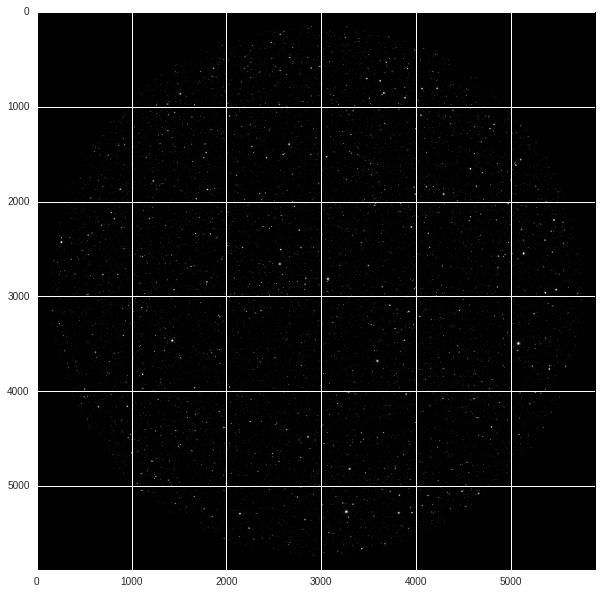

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(ml), cmap=cm.gray)

In [7]:
ml = ml.byteswap().newbyteorder()

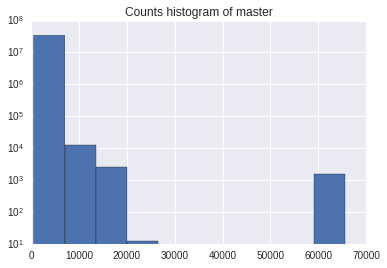

In [8]:
plt.hist(ml.flatten(), log=True)
plt.title('Counts histogram of master')
plt.show()

In [9]:
from scipy import stats

stats.describe(ml.flatten())

DescribeResult(nobs=34621456, minmax=(487.26172, 65536.0), mean=524.32971, variance=257655.41, skewness=97.87676239013672, kurtosis=12037.258924119596)

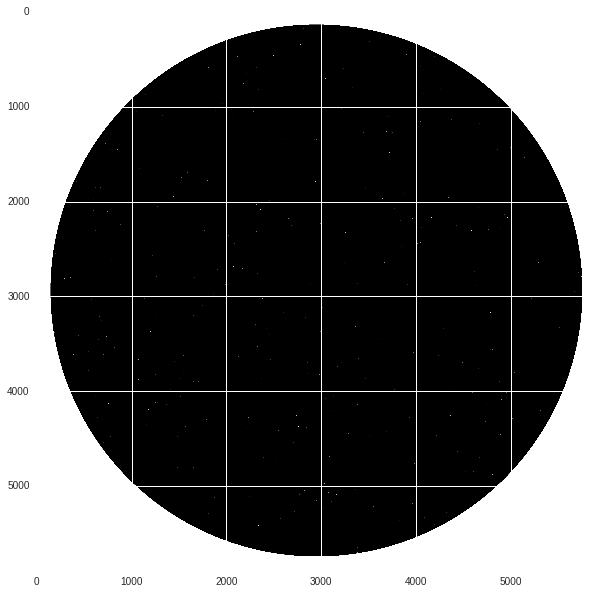

In [10]:
mask = np.where( ml== 498.28516, 1, 0)
plt.figure( figsize=(10,10))
plt.imshow(mask, cmap=cm.gray)

In [11]:
bkg = sep.Background(ml)

(array([  5.21440000e+04,   6.72435900e+06,   2.43605770e+07,
          2.82340700e+06,   5.24140000e+05,   9.39930000e+04,
          2.18570000e+04,   1.09630000e+04,   6.38700000e+03,
          3.62900000e+03]),
 array([ 494.51351929,  496.03267822,  497.55183716,  499.07099609,
         500.59015503,  502.10931396,  503.6284729 ,  505.14763184,
         506.66679077,  508.18594971,  509.70510864]),
 <a list of 10 Patch objects>)

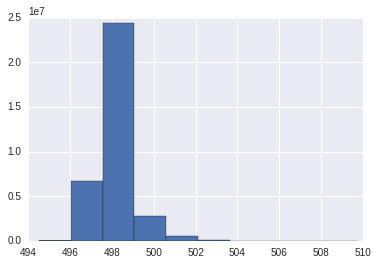

In [12]:
bkg.globalback
plt.hist(bkg.back().flatten())

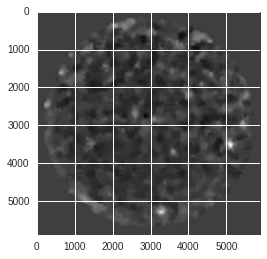

In [13]:
plt.imshow(bkg.back(), cmap=cm.gray)

In [14]:
sources = sep.extract(ml-bkg, 2.8*bkg.globalrms)

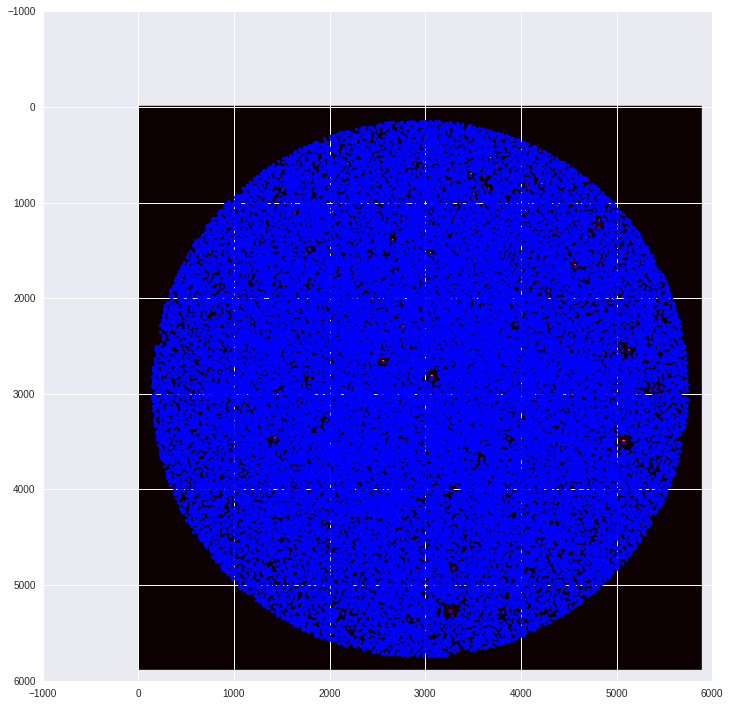

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(ml), cmap=cm.hot)
plt.plot(sources['x'], sources['y'], '.b')

In [16]:
len(sources)

36607

In [17]:
from astropy.table import Table

In [18]:
sourcesT = Table(sources)

In [110]:
indexCol = Table.Column(range(len(sources)), name='index')
sourcesT.add_column(indexCol, index=0)

In [112]:
sourcesT

index,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
int64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
0,8.36850070953,70,64,2982,2992,142,150,2987.00242005,145.34873823,5.91264018082,3.87419449093,-0.535922000771,2.45864796638,1.93439519405,-0.242042586207,0.171276703477,0.261395633221,0.0473858267069,976.518310547,1015.49633789,22.0905418396,24.099822998,2988,145,2988,145,0
1,8.36850070953,178,172,2952,2968,142,153,2960.00210806,146.998191825,11.3974280584,6.84612140155,-0.640612289886,3.38908219337,2.59955215454,-0.137202784419,0.0882029905915,0.146840408444,0.0165068414062,7529.1953125,7656.30322266,113.586128235,118.106384277,2960,147,2960,147,0
2,8.36850070953,91,75,3126,3142,147,153,3133.41038821,149.18562417,10.4341210968,1.94776010456,0.545630086586,3.23559236526,1.38304829597,0.0639440342784,0.0972642228007,0.521042943001,-0.0544936582446,3207.17700195,3262.27954102,105.691192627,149.629150391,3133,149,3134,148,0
3,8.36850070953,105,102,3041,3051,143,154,3046.08568659,148.21935452,6.56544561823,7.96884954136,-0.555102655533,2.8568983078,2.5243666172,-1.23615705967,0.15321496129,0.126232087612,0.0213456247002,1651.11523438,1715.77905273,24.9261054993,28.1149902344,3046,150,3046,143,0
4,8.36850070953,29,29,2639,2646,157,161,2642.44676075,159.1262112,3.30259911367,1.41280751417,-0.608005938326,1.86582779884,1.11089754105,-0.285883188248,0.328845471144,0.768713891506,0.283039271832,342.371734619,376.003234863,16.1449756622,17.4417114258,2642,159,2643,158,0
5,8.36850070953,75,71,2843,2855,148,155,2849.48533135,151.560004618,8.11906640256,3.88693688575,-1.43948649447,2.92613554001,1.85573005676,-0.298679202795,0.13182233274,0.27535161376,0.0976380556822,835.644714355,853.206359863,15.1365642548,16.1636962891,2850,152,2849,151,1
6,8.36850070953,206,196,2824,2844,149,162,2832.88963006,155.599429564,13.644092524,8.58139248468,0.358597063706,3.69721055031,2.92508435249,0.0703629925847,0.0733723789454,0.116659328341,-0.00613213283941,5329.12207031,5370.13476562,67.214263916,69.8581237793,2833,156,2833,156,1
7,8.36850070953,101,99,2658,2669,155,165,2663.63447846,160.040347028,7.3206558952,5.00706547379,-0.141949850226,2.70727396011,2.23570775986,-0.0610495880246,0.136674910784,0.199827626348,0.00774944294244,2208.59326172,2263.84179688,40.9314460754,43.1430664062,2664,160,2664,160,0
8,8.36850070953,53,49,3005,3013,160,166,3008.9760511,162.873324315,4.92336762769,2.80813995066,0.479701254928,2.24211335182,1.64451682568,0.212909132242,0.206550866365,0.362135022879,-0.0705682113767,641.289978027,662.705749512,16.5070476532,17.9379577637,3009,163,3009,163,0


In [113]:
sourcesT.write('./../../../data/extract_test/master2010_masked_wcs.fitssources_detected_master2010_masked_wcs.csv', 
               format='csv')

## Rotate the *new image*

In [19]:
import astroalign
reload(astroalign)

<module 'astroalign' from '/home/bos0109/sersic/work/rhino/lib/python2.7/site-packages/astroalign-1.0a2-py2.7.egg/astroalign/__init__.pyc'>

In [20]:
ryanmaster = os.path.abspath('./../../../data/extract_test/stellar/CSTAR/images/master10_wcs.fits')

mr = fits.getdata(ryanmaster)

In [21]:
astroalign.align.align_image?

In [26]:
mlaligned = astroalign.align.align_image(ml, mr, n_test_src=50, n_ref_src=50, px_tol=2.)

(array([  3.95719900e+06,   1.71980000e+04,   1.47030000e+04,
          1.64800000e+04,   3.06058610e+07,   6.18600000e+03,
          1.97500000e+03,   1.31800000e+03,   3.64000000e+02,
          1.72000000e+02]),
 array([-40179.5625   , -30837.3609375, -21495.159375 , -12152.9578125,
         -2810.75625  ,   6531.4453125,  15873.646875 ,  25215.8484375,
         34558.05     ,  43900.2515625,  53242.453125 ]),
 <a list of 10 Patch objects>)

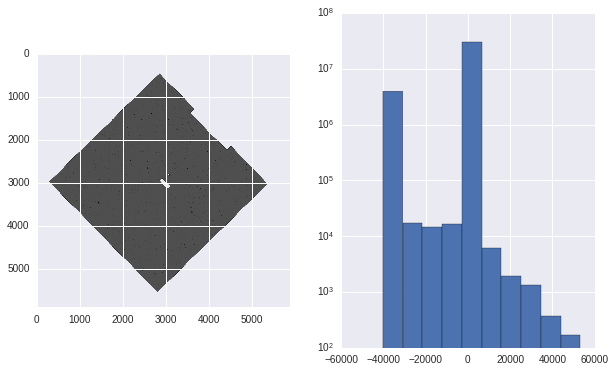

In [38]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(np.log10(mlaligned), cmap=cm.gray_r)
plt.subplot(122)
plt.hist(mlaligned.flatten(), log=True)

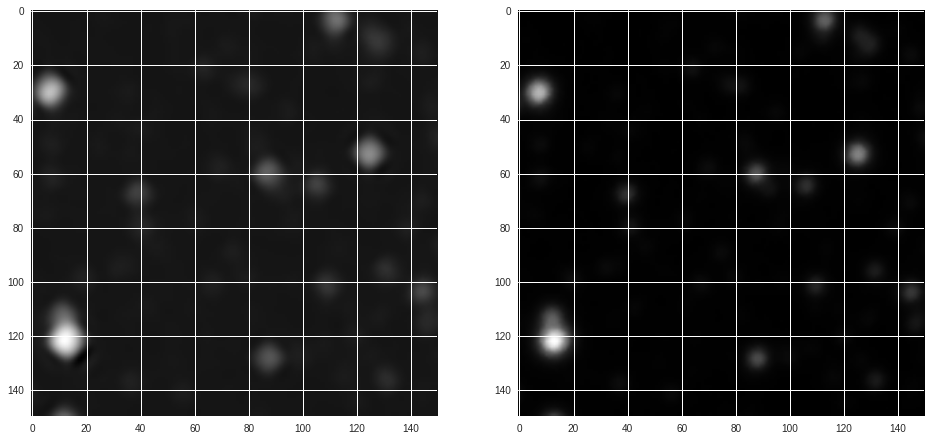

In [76]:
plt.figure(figsize=(16,10))
plt.subplot(121)
#plt.plot(sourcesR['x'], sourcesR['y'], '.r')
plt.imshow(np.log10(mlaligned[2000:2150, 2000:2150]), cmap=cm.gray, interpolation=None)

plt.subplot(122)
plt.imshow(np.log10(ml[2000:2150, 2000:2150]), cmap=cm.gray, interpolation=None)

In [56]:
stats.describe(mlaligned.flatten())

DescribeResult(nobs=34621456, minmax=(-40179.562, 53242.453), mean=-3629.073, variance=1.1043719e+08, skewness=-2.404517650604248, kurtosis=3.825396314851983)

In [67]:
mlaligned[0:100, 0:100]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

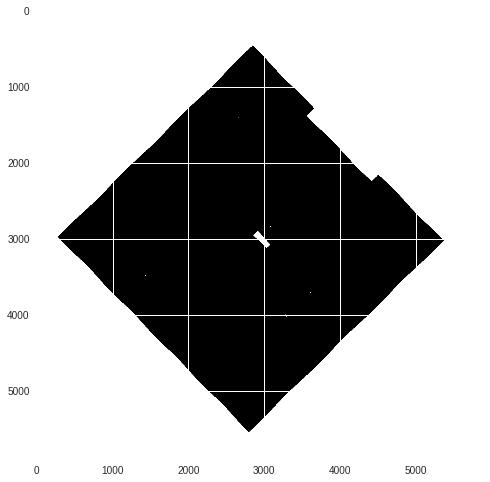

In [91]:
maskr = np.where(mlaligned > 0., False, True)
plt.figure(figsize=(8,8))
plt.imshow(maskr, cmap=cm.gray)

In [92]:
maskr.shape, mlaligned.shape

((5884, 5884), (5884, 5884))

In [140]:
sep.set_extract_pixstack(1500000)
bkgl = sep.Background(mlaligned, mask = maskr)
thresh = 3.
sourcesR = sep.extract(mlaligned - bkgl, thresh*bkgl.globalrms, mask=maskr)
sourcesR = Table(sourcesR)

(2000, 3000)

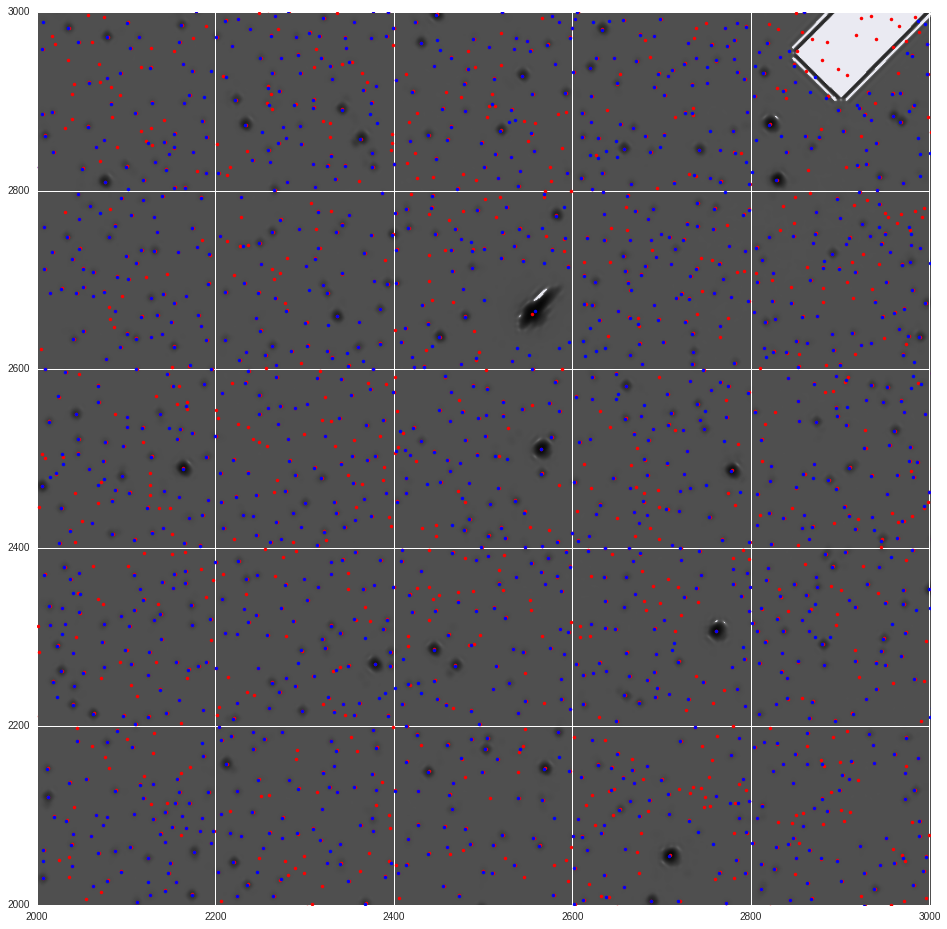

In [141]:
plt.figure(figsize=(16,16))

plt.plot(sourcesT['x'], sourcesT['y'], '.r')
plt.plot(sourcesR['x'], sourcesR['y'], '.b')

plt.imshow(np.log10(mlaligned), cmap=cm.gray_r)
plt.xlim(2000,3000)
plt.ylim(2000,3000)

### Try now to match both catalogues produced

If these two catalogs are matched succesfully I can try to extract reals from variable stars

In [142]:
import astroML.crossmatch as cx

In [143]:
S = np.array([sourcesT['x'], sourcesT['y']]).T ##master
O = np.array([sourcesR['x'], sourcesR['y']]).T

In [144]:
distr, indr  = cx.crossmatch(S, O, max_distance=0.8)

In [145]:
matchsr = ~np.isinf(distr)

In [146]:
distl, indl  = cx.crossmatch(O, S, max_distance=0.8)

In [147]:
matchsl = ~np.isinf(distl)

In [148]:
objID = np.zeros_like(O[:,0]) -1
CSTARID = np.zeros_like(O[:,0]) -1
for i in range(len(O)):
    if distl[i] != np.inf: 
        dist_o = distl[i]
        ind_o  = indl[i]
        # now ind is a star number
        # lets see if that star has matched the same obj
        if distr[ind_o] != np.inf:
            dist_s = distr[ind_o]
            ind_s = indr[ind_o]
            if ind_s == i:
                objID[i] = ind_o  
                CSTARID[i] = sourcesT['index'][ind_o]

In [149]:
sum(objID > 0)

11387

In [150]:
len(O), len(S)

(15657, 36607)

In [151]:
sourcesR.add_column(Table.Column(objID, 'objID'))
sourcesR.add_column(Table.Column(CSTARID, 'master_index'))

# This proves 

* We can match sources by rotating frames, 
* We can assign coordinates by matching x-y and after that using wcs